# VADER

https://github.com/cjhutto/vaderSentiment
http://www.benedekkurdi.com/#oasis


The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).

Compound score is a 'normalized, weighted composite score' is accurate.

VADER system classify given text into 3 categores:
    - positive : compound score >=  0.05
    - neutral  : -0.05 < compound score < 0.05
    - negative : compound score <= -0.05

## Install VADER package

In [1]:
!pip install vaderSentiment
from utils.data_utils import *
import numpy as np
import matplotlib.pyplot as plt

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Sample Image captions of OASIS dataset

In [2]:
image_captions=["the women are proudly walking in a parade.",
               "instruments of torture in the room and on the walls can inflict pain and suffering.",
               "people being subjugated is not pleasant.",
               "roller coasters are fun.",
               "ape in confinement is looking apprehensive, confining wild animals is bad.",
               "roller coaster tracks disappearing into the snow hint at excitement.",
               "the men look like they are happy with each other and ready to embrace.",
               "A dirty American flag and white shoe, lying in broken wood with plants growing through it.",
               "Two sled dogs in harness, running across a snowy field.",
               "A brown dog sitting on a garden path.  His mouth is open and his mottled tongue is hanging out. He has a chain collar around his neck.",
               "A brown and white beagle wearing a black collar, sitting with its mouth open.",
               "A short-haired brown dog and a guinea pig, lying side by side on a red couch.",
               "A dog on a leash with its mouth open, looking alertly towards the camera.",
               "An enormous mushroom cloud rises from Bikini Atoll.",
               ]
print("Total sample captions",len(image_captions))

Total sample captions 14


## Evaluate valence scores of sample captions via VADER

In [3]:
print_polarity_scores(image_captions)

the women are proudly walking in a parade. 
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.5574} POSITIVE

instruments of torture in the room and on the walls can inflict pain and suffering. 
 {'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'compound': -0.8834} NEGATIVE

people being subjugated is not pleasant. 
 {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4023} NEGATIVE

roller coasters are fun. 
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.5106} POSITIVE

ape in confinement is looking apprehensive, confining wild animals is bad. 
 {'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'compound': -0.5423} NEGATIVE

roller coaster tracks disappearing into the snow hint at excitement. 
 {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4939} POSITIVE

the men look like they are happy with each other and ready to embrace. 
 {'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.875} POSITIVE

A dirty American flag and white shoe, lying in broken wood with plants growing 

{'A brown and white beagle wearing a black collar, sitting with its mouth open.': 0,
 'A brown dog sitting on a garden path.  His mouth is open and his mottled tongue is hanging out. He has a chain collar around his neck.': 0,
 'A dirty American flag and white shoe, lying in broken wood with plants growing through it.': -1,
 'A dog on a leash with its mouth open, looking alertly towards the camera.': 0,
 'A short-haired brown dog and a guinea pig, lying side by side on a red couch.': -1,
 'An enormous mushroom cloud rises from Bikini Atoll.': 0,
 'Two sled dogs in harness, running across a snowy field.': 0,
 'ape in confinement is looking apprehensive, confining wild animals is bad.': -1,
 'instruments of torture in the room and on the walls can inflict pain and suffering.': -1,
 'people being subjugated is not pleasant.': -1,
 'roller coaster tracks disappearing into the snow hint at excitement.': 1,
 'roller coasters are fun.': 1,
 'the men look like they are happy with each other an

## TODO:
- read all captions from captions.csv file
- read all valence score from OASIS.csv file
- run all captions in OASIS dataset into VADER system and compare the valences score from OASIS.csv with compound scores from VADER
- print accuracy of the VADER system vs human rating

## Read Image Valence scores and label them

minValence -1.0 maxValence 1.0 meanValence 0.19776832186355742 0.45589750942956936 

Histogram of positive, negative and neutral images in OASIS {1: 608, -1: 248, 0: 44}


,id,theme,category,source,valence_mean,valence_std,valence_n,arousal_mean,arousal_std,arousal_n
0,I1,Acorns 1,Object,Pixabay,4.686275,0.954203,102,2.346535,1.602720,101
1,I2,Acorns 2,Object,Pixabay,4.519608,0.841150,102,2.227723,1.399151,101
2,I3,Acorns 3,Object,Pixabay,4.754902,0.958921,102,2.306931,1.514877,101
3,I4,Alcohol 1,Object,Pixabay,4.685185,1.189111,108,2.865385,1.695555,104
4,I5,Alcohol 2,Object,Pixabay,4.250000,1.136686,108,3.000000,1.700942,104


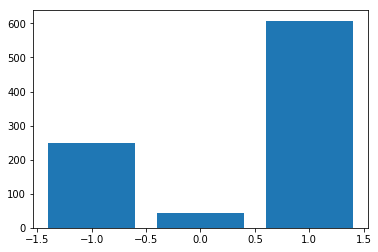

In [4]:
oasis_csv_path = "dataset/metadata/OASIS.csv"

imageIdToValence = get_image_id_to_valence_mean(oasis_csv_path)

imageIdToValenceNormalized = get_normalized_valence_mean(imageIdToValence)


valence_values = list(imageIdToValenceNormalized.values())

minValence = min(valence_values)
maxValence = max(valence_values)
meanValence = np.mean(valence_values)
stdValence = np.std(valence_values)
print("minValence", minValence,"maxValence",maxValence, "meanValence",meanValence, stdValence,"\n")

labelToCount = {}
for imageId in imageIdToValenceNormalized:
    label = convert_compound_score_to_label(imageIdToValenceNormalized[imageId])
    if label not in labelToCount:
        labelToCount[label] = 0
    labelToCount[label] += 1

print("Histogram of positive, negative and neutral images in OASIS",labelToCount)    

#plt.hist(labels, normed=True, bins=3)
plt.bar(list(labelToCount.keys()), labelToCount.values())

read_oasis_csv_into_dataframe(oasis_csv_path).head()

## Conclusion of the experiment